**<h1>CASO 4</h1>**

![especificaciones](huch.jpeg)


In [1234]:
import pandas as pd
from sklearn.datasets import load_iris

irisdata = load_iris(as_frame=True)

# Convierte irisdata.data en un DataFrame
dfiris = pd.DataFrame(irisdata.data, columns=irisdata.feature_names)

# Ahora, dfiris es un DataFrame de pandas que contiene los datos de California Housing
dfiris.head()

df = irisdata.frame

In [1235]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [1236]:
# Renombra las columnas con guiones bajos en lugar de espacios
df.columns = df.columns.str.replace(' ', '_')

# Verifica los nombres de las columnas
print(df.columns)

Index(['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)',
       'petal_width_(cm)', 'target'],
      dtype='object')


In [1237]:
# Vamos a crear los bins de datos para transformar nuestros valores continuos en categorías:
df["cat"] = pd.qcut(df['petal_width_(cm)'], 4 , retbins=False, labels=[1, 2,3,4])
df["cat"]

0      1
1      1
2      1
3      1
4      1
      ..
145    4
146    4
147    4
148    4
149    3
Name: cat, Length: 150, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [1238]:
y = df['cat']
X = df.drop([ 'cat','petal_width_(cm)'], axis = 1)

In [1239]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [1240]:
# Escalado de características para la clasificación
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1241]:
X_train


array([[-1.01827123,  1.2864604 , -1.39338902, -1.2725257 ],
       [-0.7730102 ,  2.43545215, -1.33550342, -1.2725257 ],
       [-0.03722712, -0.78172474,  0.74837808,  1.20613306],
       [ 0.20803391,  0.8268637 ,  0.4010645 , -0.03319632],
       [ 1.06644751,  0.13746866,  0.51683569, -0.03319632],
       [-0.52774918,  1.97585545, -1.45127462, -1.2725257 ],
       [-0.52774918,  1.51625875, -1.33550342, -1.2725257 ],
       [-0.40511866, -1.47111979, -0.06202028, -0.03319632],
       [ 0.57592545, -0.55192639,  0.74837808,  1.20613306],
       [ 0.69855596,  0.13746866,  0.97992047,  1.20613306],
       [ 0.94381699, -0.09232969,  0.3431789 , -0.03319632],
       [ 1.67960008,  1.2864604 ,  1.32723405,  1.20613306],
       [-0.15985763, -0.32212804,  0.2274077 , -0.03319632],
       [ 2.17012213, -0.09232969,  1.61666204,  1.20613306],
       [-0.28248815, -0.09232969,  0.4010645 , -0.03319632],
       [-0.89564072,  1.05666205, -1.39338902, -1.2725257 ],
       [ 2.29275265, -0.

In [1242]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [1243]:
# Tras ajustar el KNeighborsClassifier, podemos predecir las clases de los datos de prueba:
y_pred = classifier.predict(X_test)

In [1244]:
acc =  classifier.score(X_test, y_test)
print(acc) # 0.6191860465116279

0.7631578947368421


              precision    recall  f1-score   support

           1       0.80      1.00      0.89        12
           2       0.80      0.50      0.62         8
           3       0.58      0.88      0.70         8
           4       1.00      0.60      0.75        10

    accuracy                           0.76        38
   macro avg       0.80      0.74      0.74        38
weighted avg       0.81      0.76      0.75        38



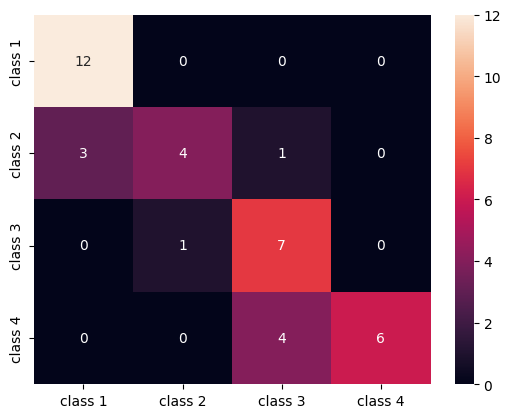

In [1245]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

None 0.8133333333333334


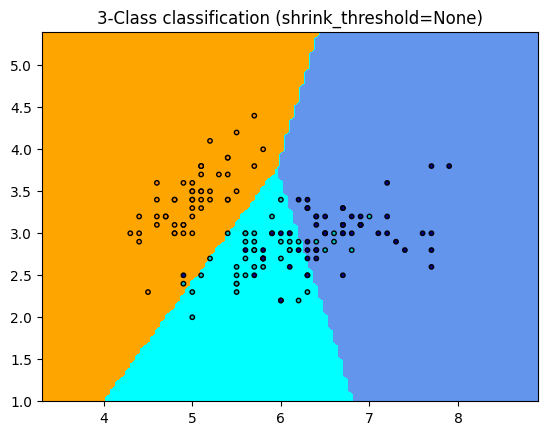

In [1246]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid

iris = load_iris()
X = iris.data
y = iris.target
# Suponiendo que X es un DataFrame de pandas
X_2d = X[:, [0, 1]]
y = iris.target

# Suponiendo que X es un DataFrame de pandas
#X_2d = X[['sepal_length_(cm)', 'petal_width_(cm)']].to_numpy()
#y = df["sepal_width_cat"]
# Ahora X_2d será un arreglo NumPy bidimensional con las dos variables seleccionadas
#print(X_2d)

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])

for shrinkage in [None]:
    # we create an instance of Nearest Centroid Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X_2d, y)
    y_pred = clf.predict(X_2d)
    print(shrinkage, np.mean(y == y_pred))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X_2d, cmap=cmap_light, ax=ax, response_method="predict"
    )

    # Plot also the training points
    plt.scatter(X_2d[:, 0],X_2d[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=10)
    plt.title("3-Class classification (shrink_threshold=%r)" % shrinkage)
    plt.axis("tight")

plt.show()


In [1247]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

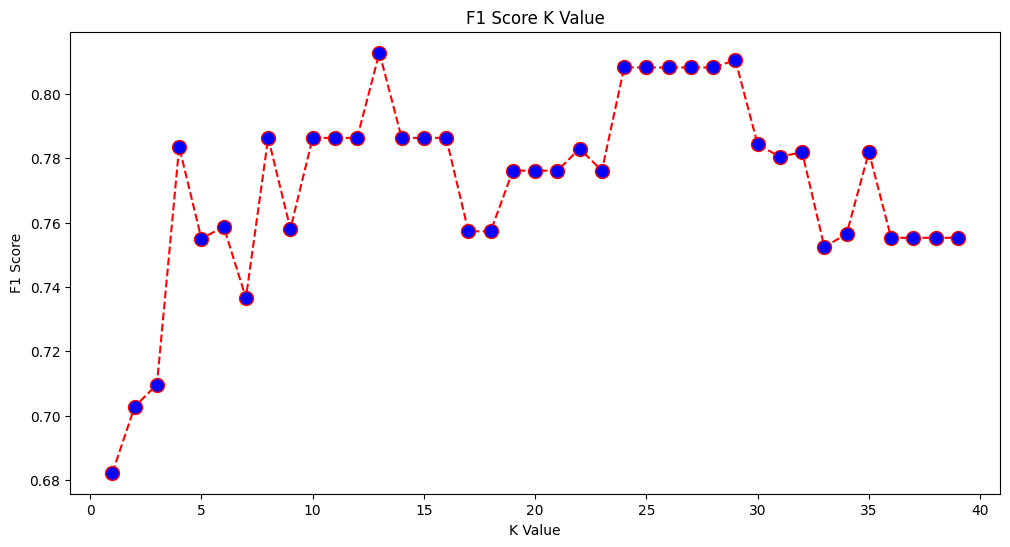

In [1248]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [1249]:
classifier15 = KNeighborsClassifier(n_neighbors=15)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           1       0.80      1.00      0.89        12
           2       0.71      0.62      0.67         8
           3       0.67      0.75      0.71         8
           4       1.00      0.70      0.82        10

    accuracy                           0.79        38
   macro avg       0.80      0.77      0.77        38
weighted avg       0.81      0.79      0.79        38



In [1250]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(X_train)
# Distances and indexes of the 5 neighbors 
distances, indexes = nbrs.kneighbors(X_train)

In [1251]:
distances[:3], distances.shape

(array([[0.        , 0.12263051, 0.23697684, 0.25731353, 0.26047173],
        [0.        , 0.43760966, 0.53365257, 0.53365257, 0.70260552],
        [0.        , 0.        , 0.22979835, 0.35547605, 0.47918484]]),
 (112, 5))

In [1252]:
indexes[:3], indexes[:3].shape


(array([[  0,  94,  19,  50,  63],
        [  1,  33,  40,   5,  76],
        [ 35,   2,  48, 104,  32]]),
 (3, 5))

Text(0, 0.5, 'Mean Distances')

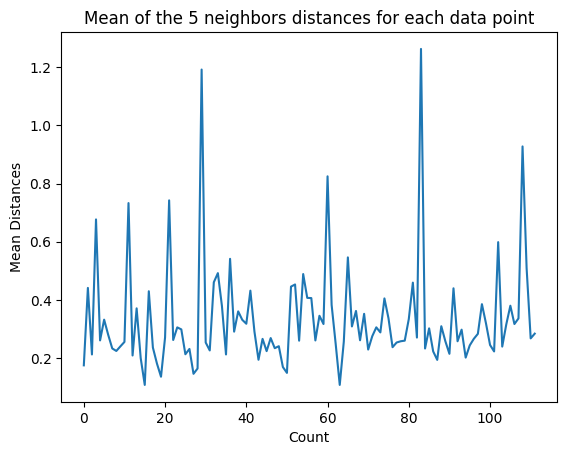

In [1253]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

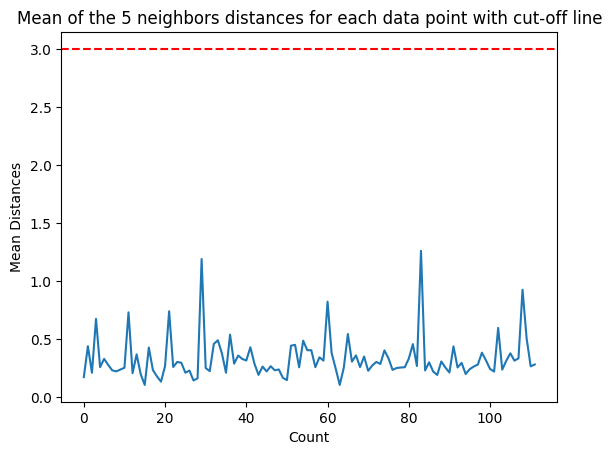

In [1254]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point with cut-off line')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 3, color = 'r', linestyle = '--')